# Classification Dictionary

This serves as a repository for functions regarding classification.

To test the functions, the banknote.csv file will be used to classify whether a bill is counterfit or not based on the information in the data set.

### List of Functions

1. Convert Columns to Standard Units
2. Split Data Set
3. Visualize data in 3d
4. Classifies point with given k
5. Test accuracy of model


### Imports

In [331]:
import numpy as np
from datascience import *

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

df0 = pd.read_csv(r'banknote.csv')
df = df0.replace(to_replace = {
            'Class' : {(0):'Counterfit',
                       (1):'Real'}})
df

WaveletVar  WaveletSkew  WaveletCurt  Entropy       Class
0        3.62160      8.66610      -2.8073 -0.44699  Counterfit
1        4.54590      8.16740      -2.4586 -1.46210  Counterfit
2        3.86600     -2.63830       1.9242  0.10645  Counterfit
3        3.45660      9.52280      -4.0112 -3.59440  Counterfit
4        0.32924     -4.45520       4.5718 -0.98880  Counterfit
...          ...          ...          ...      ...         ...
1367     0.40614      1.34920      -1.4501 -0.55949        Real
1368    -1.38870     -4.87730       6.4774  0.34179        Real
1369    -3.75030    -13.45860      17.5932 -2.77710        Real
1370    -3.56370     -8.38270      12.3930 -1.28230        Real
1371    -2.54190     -0.65804       2.6842  1.19520        Real

[1372 rows x 5 columns]

### Convert Columns to Standard Units

In [332]:
#Converts the float or int values from a column in a table to standard units
#and returns an array.
def convert_to_standard_units(table, column):
    arr_col = table[column]
    mean_col = np.mean(arr_col)
    sd_col = np.std(arr_col)
    standardized = (arr_col - mean_col) / sd_col
    return standardized

In [333]:
convert_to_standard_units(df, 'WaveletVar')[:5]

0    1.121806
1    1.447066
2    1.207810
3    1.063742
4   -0.036772
Name: WaveletVar, dtype: float64

In [334]:
notes_su = Table().with_columns(
    'WaveletVar SU', convert_to_standard_units(df, 'WaveletVar'),
    'WaveletSkew SU', convert_to_standard_units(df, 'WaveletSkew'),
    'WaveletCurt SU', convert_to_standard_units(df, 'WaveletCurt'),
    'Entropy SU', convert_to_standard_units(df, 'Entropy'),
    'Class', df['Class'])

notes_su

WaveletVar SU | WaveletSkew SU | WaveletCurt SU | Entropy SU | Class
1.12181       | 1.14946        | -0.97597       | 0.354561   | Counterfit
1.44707       | 1.06445        | -0.895036      | -0.128767  | Counterfit
1.20781       | -0.777352      | 0.122218       | 0.618073   | Counterfit
1.06374       | 1.29548        | -1.2554        | -1.14403   | Counterfit
-0.0367718    | -1.08704       | 0.73673        | 0.096587   | Counterfit
1.3846        | 1.32087        | -1.24365       | -0.938386  | Counterfit
1.11111       | 0.185881       | -0.155217      | 0.836028   | Counterfit
0.583612      | -1.48841       | 1.64002        | 0.28068    | Counterfit
0.974571      | 0.653913       | -0.499268      | 0.275752   | Counterfit
0.387745      | 1.23657        | -0.85168       | 0.217263   | Counterfit
... (1362 rows omitted)

### Split the data into training and test set

In [335]:
#Splits a dataset
#Replace 'df' with desired dataframe
#Replace .75(default) w/ percent of data one wants to train the model on
df1 = notes_su
training_proportion = .75

#Don't Touch
#Shuffles the dataframe
df2 = df1.sample(with_replacement = False)

#Don't Touch!
#Determines training number of rows.
num_rows = df2.shape[0]
train_num = (num_rows*training_proportion).astype(int)

#Don't Touch!
#Splits the set
train_df = df2.take(np.arange(train_num))
test_df = df2.take(np.arange(train_num, num_rows))

#prints number of rows for training and testing.
#Don't Touch!
print('Training: ', train_df.shape[0],  
     ';', 'Test:', test_df.shape[0])

Training:  [[1029]] ; Test: [[343]]


C:\Users\raywz\anaconda3\lib\site-packages\datascience\tables.py:222: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


In [336]:
train_df

WaveletVar SU | WaveletSkew SU | WaveletCurt SU | Entropy SU | Class
1.16069       | -0.989679      | 0.454936       | 0.564509   | Counterfit
1.88215       | 0.623232       | -0.883501      | 0.540497   | Counterfit
-0.688502     | -1.43197       | 1.01177        | 0.983173   | Real
-0.296737     | -0.354116      | -0.310339      | 0.525105   | Real
-1.5679       | -1.74306       | 2.58964        | -0.151527  | Real
-0.801497     | -1.80161       | 1.45806        | 0.249893   | Real
0.183876      | 0.0938223      | 0.710271       | 0.670405   | Counterfit
-0.0367718    | -1.08704       | 0.73673        | 0.096587   | Counterfit
0.249589      | -0.185522      | 0.941769       | 0.296068   | Counterfit
-1.06472      | -0.507534      | 0.579621       | 0.937616   | Real
... (1019 rows omitted)

### Scatterpots 3d variables

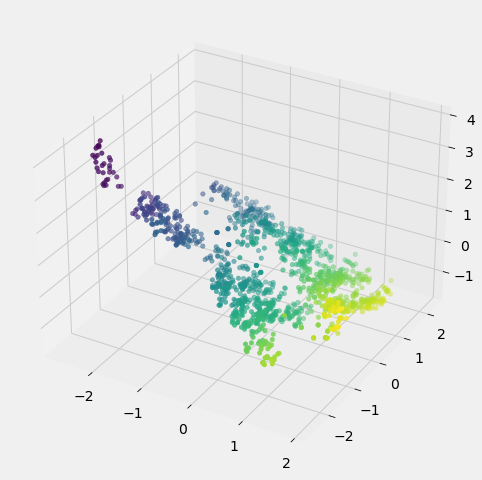

In [339]:
#replace df w/ desired df.
#replace col1, col2, and col3 with desired variables
notes_su
col1 = 'WaveletSkew SU'
col2 = 'WaveletVar SU'
col3 = 'WaveletCurt SU'

scat = plt.figure(figsize=(8,8)).add_subplot(111, projection='3d')

# Create the colors list using the function above
scat.scatter( df2[col1], 
            df2[col2], 
            df2[col3],
             c = df2[col1]) 

# Functions for Classification

### Classifies Given Point

In [354]:
#Classifies a point based on data.
#k is the number of nearest neighbors
#Must have a column named "Class" to classify data against.
def classify(training_set, new_point, k):
    
    #Takes distances from given point and every point in the data set
    #Then adds a column to the data with the distance.
    def table_with_distances(training_set, new_point):
        
        #Returns the distance between two points in two arrays.
        def distance(point1, point2):
            return np.sqrt(np.sum((point1 - point2)**2))
    
        #Creates an array of distances from point.
        attributes = training_set.drop('Class')
        def distance_from_point(row):
               return distance(np.array(list(new_point)), np.array(list(row)))
        distance_arr = attributes.apply(distance_from_point)
    
        #Creates a table with distances
        distance_table = training_set.with_column('Distance', distance_arr)
    
        return distance_table
    
    #Picks k number of closest distances
    def closest(training_set, new_point, k):
        #Uses table_with_distances to select k from.
        distances_table = table_with_distances(training_set, new_point)
        sorted_table = distances_table.sort('Distance')
        top_k = sorted_table.take(np.arange(k))
        return top_k
    
    #Takes the closest points and finds a majority from the Class column
    def classify(topk):
        closest_points = closest(training_set, new_point, k)
        #makes count of unique values in Class
        unique_classes, unique_class_count = np.unique(closest_points['Class'], return_counts = True)
        #sorts based on most common item
        arr_neighbors_sort = np.argsort( - unique_class_count)
        #returns the class that appears the most
        most_common_class = unique_classes[arr_neighbors_sort].item(0)
        return most_common_class
        
    return classify(closest(training_set, new_point, k))

In [360]:
classify(train_df, train_df.drop('Class').row(12), 10)

'Real'

### Test Accuracy of Model

In [376]:
#Returns the accuracy of the classifier.
#classify_model should have 3 arguments; training set, array to test, k.
def accuracy_of_model(classify_model, training_set, test_set, k):
    test_attributes = test_set.drop('Class')
    num_correct = 0
    for i in np.arange(test_set.num_rows):
        classified = classify_model(train_df, test_attributes.row(i), k)
        #Calculates the number of rows that were correct
        num_correct = num_correct + (classified == test_set.column('Class').item(i))
    return num_correct /test_set.num_rows

In [377]:
accuracy_of_model(classify, train_df, test_df, 20)

0.9883381924198251

Normally, having an extremely accurate model like this would be a sign of overfitting.
<br>However, these variables are known to estimate the outcome of counterfitting extremely well.
<br>The row to be tested is also in the data set, improving accuracy slightly. This should be taken into account, as the closest k will always be correct.
<br>Even with larger k counts, it is still rather accurate.
<br>This is only supposed to be a dictionary of K-Nearest neighbors from scratch.
<br>In a real life scenario, the specific instance would not be known and included in the dataset.